# Projeto Final - EBAC - Taxa CDI
Este notebook coleta dados da taxa CDI via API do Banco Central e plota um gráfico histórico.

In [8]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import json
import requests
from datetime import datetime
from random import random

# Função para extrair dados da API do Banco Central
def extrair_dados():
    url = 'https://api.bcb.gov.br/dados/serie/bcdata.sgs.12/dados?formato=json'
    try:
        response = requests.get(url)
        response.raise_for_status()
    except requests.HTTPError:
        print("Dado não encontrado, continuando.")
        return
    except Exception as exc:
        print("Erro, parando a execução.")
        raise exc

    dados = json.loads(response.text)
    ultimo_dado = dados[-1]
    cdi = float(ultimo_dado['valor'].replace(',', '.')) + (random() - 0.5)
    data = datetime.now().strftime('%Y-%m-%d')
    hora = datetime.now().strftime('%H:%M:%S')

    if not os.path.exists('taxa-cdi.csv'):
        with open('taxa-cdi.csv', mode='w', encoding='utf8') as fp:
            fp.write('data,hora,taxa\n')

    with open('taxa-cdi.csv', mode='a', encoding='utf8') as fp:
        fp.write(f'{data},{hora},{cdi}\n')

    print("Extração concluída com sucesso!")

# Executa a função de extração
extrair_dados()


Dado não encontrado, continuando.


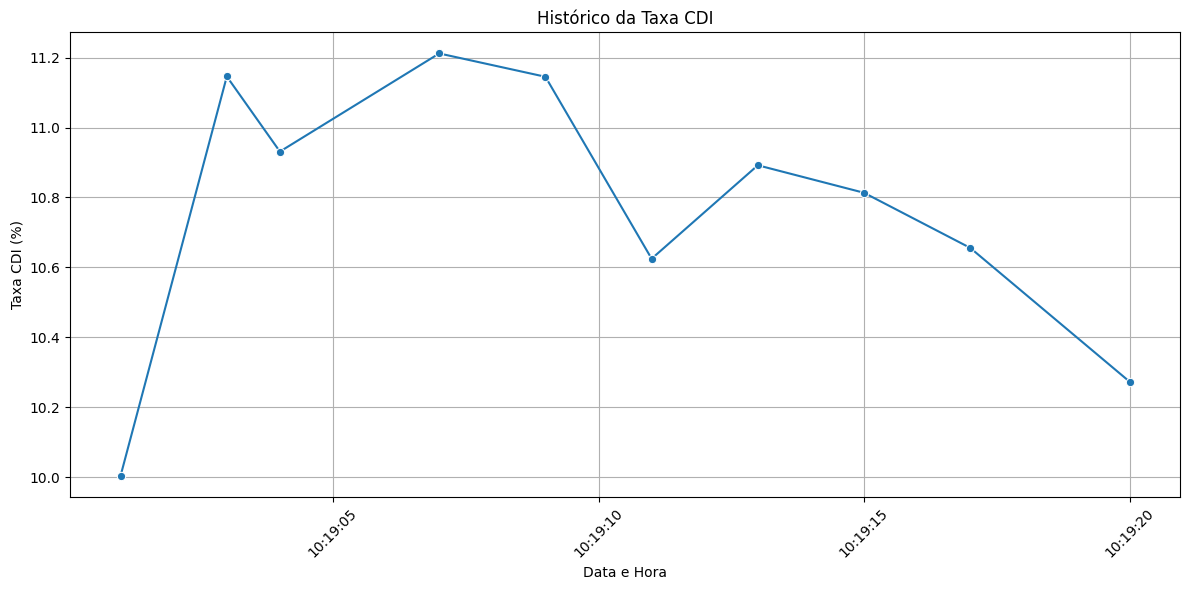

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Ler o CSV (com caminho correto)
df = pd.read_csv("C:/Ebac/Python Scripting/taxa-cdi.csv")

# 2. Criar nova coluna combinando data e hora
df['datahora'] = pd.to_datetime(df['data'] + ' ' + df['hora'])

# 3. Ordenar pela nova coluna
df = df.sort_values('datahora')

# 4. Gerar gráfico
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="datahora", y="taxa", marker="o")
plt.title("Histórico da Taxa CDI")
plt.xlabel("Data e Hora")
plt.ylabel("Taxa CDI (%)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()
